线性回归
  
  线性回归是分析因变量与自变量之间的关系的一种方法，目的是求解参数w,b。
  
  线性回归求解的步骤:
  
  1.确定模型: y=wx+b
  
  2.选择损失函数，一般使用均方误差MSE:$\frac{1}{m}\sum_{i=1}^m(y_i - \hat{y_i})^2$ 。其中$y_i$是真实值，$\hat{y_i} $是预测值。
  
  3.使用梯度下降法求解梯度（其中lr是学习率）更新参数:
      
      w = w - lr*w.grad
      
      b = b - lr*b.grad

让我们首先通过一个简单的线性回归的例子来说明：

In [31]:
import torch
import matplotlib.pyplot as plt
#1 准备数据
x_data = torch.tensor([[1.0], [2.0], [3.0]])  # 形状 (3, 1)
y_data = torch.tensor([[2.0], [4.0], [3.0]])  # 形状 (3, 1)

#2. 初始化参数
w =torch.tensor([[1.0]],requires_grad = True)
b = torch.tensor([[0.0]],requires_grad = True)

#3.前向传播
def forward(x):
    return torch.mm(x,w)+b

#定义损失函数
def loss(y_pred,y_true):
    return ((y_pred - y_true)**2).mean()

#训练过程
lr = 0.01
epochs = 500

for epoch in range(epochs):
    #前向传播
    y_pred =forward(x_data)

    #计算损失函数
    l = loss(y_pred,y_data)

    #反向传播 计算梯度
    l.backward()

    #打印信息
    if epoch %10 ==0:
        print(f"Epoch {epoch}: w = {w.item():.3f} , b = {b.item():.3f} , loss = {l.item():.3f}")

    #手动更新权重 不需要跟踪梯度
    with torch.no_grad():
        w -=lr*w.grad
        b -=lr*b.grad

        #清零梯度
        w.grad.zero_()
        b.grad.zero_()



Epoch 0: w = 1.000 , b = 0.000 , loss = 1.667
Epoch 10: w = 1.201 , b = 0.141 , loss = 1.037
Epoch 20: w = 1.249 , b = 0.214 , loss = 0.957
Epoch 30: w = 1.252 , b = 0.265 , loss = 0.930
Epoch 40: w = 1.240 , b = 0.309 , loss = 0.909
Epoch 50: w = 1.225 , b = 0.350 , loss = 0.890
Epoch 60: w = 1.208 , b = 0.390 , loss = 0.872
Epoch 70: w = 1.191 , b = 0.428 , loss = 0.854
Epoch 80: w = 1.175 , b = 0.466 , loss = 0.838
Epoch 90: w = 1.159 , b = 0.502 , loss = 0.822
Epoch 100: w = 1.143 , b = 0.538 , loss = 0.807
Epoch 110: w = 1.128 , b = 0.573 , loss = 0.792
Epoch 120: w = 1.113 , b = 0.607 , loss = 0.779
Epoch 130: w = 1.098 , b = 0.640 , loss = 0.765
Epoch 140: w = 1.084 , b = 0.672 , loss = 0.753
Epoch 150: w = 1.070 , b = 0.704 , loss = 0.741
Epoch 160: w = 1.057 , b = 0.734 , loss = 0.730
Epoch 170: w = 1.043 , b = 0.765 , loss = 0.719
Epoch 180: w = 1.031 , b = 0.794 , loss = 0.709
Epoch 190: w = 1.018 , b = 0.823 , loss = 0.699
Epoch 200: w = 1.006 , b = 0.851 , loss = 0.690
Epo

In [ ]:
下面是另外一个例子：

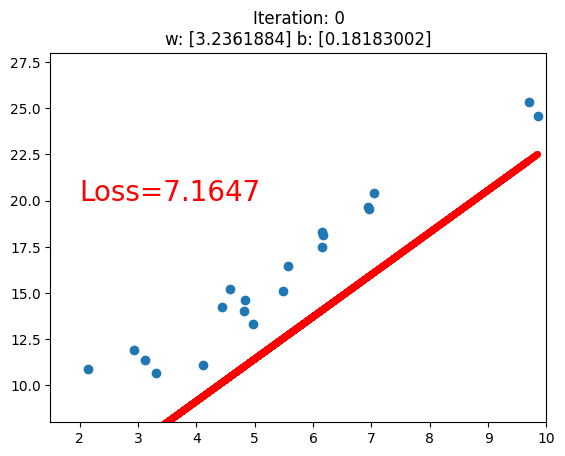

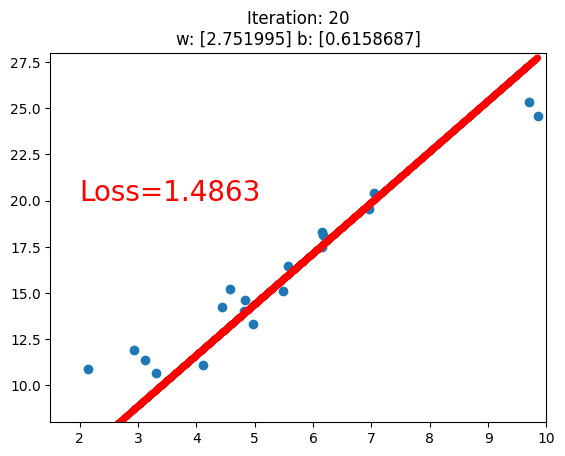

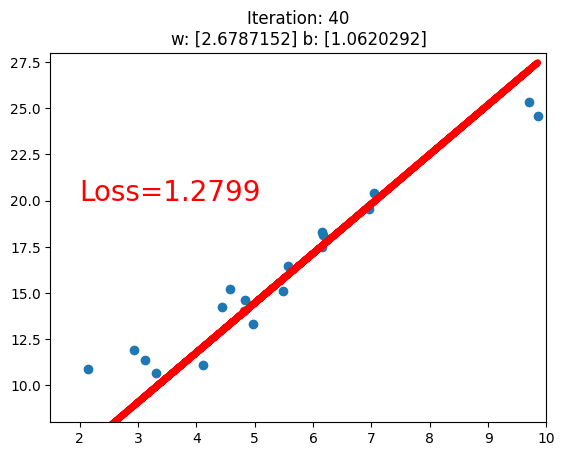

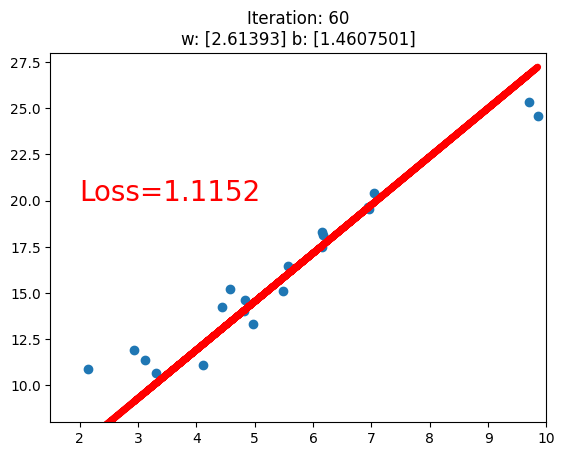

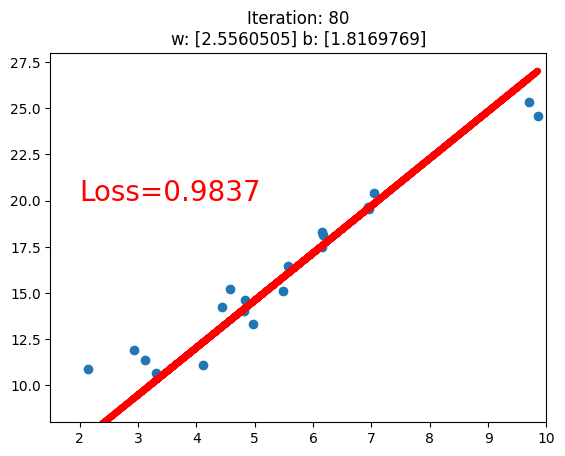

In [36]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05  # 学习率

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
# torch.randn(20, 1) 用于添加噪声
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 初始化线性回归参数，
w = torch.randn((1), requires_grad=True) # 设置梯度求解为 true
b = torch.zeros((1), requires_grad=True) # 设置梯度求解为 true

#前向传播
def forward(w,x):
    wx= torch.mul(w,x)
    y_pred = torch.add(wx,b)
    return y_pred

#定义损失函数MSE
def loss(y_pred,y_true):
    l = (0.5 * (y_pred - y_true ) ** 2).mean()
    return l
# 迭代训练 1000 次
for iteration in range(1000):

    # 前向传播，计算预测值
   
    y_pred =forward(w,x)

    # 计算 MSE loss
    l = loss(y_pred,y)

    # 反向传播
    l.backward()

    # 更新参数,
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 每次更新参数之后，都要清零张量的梯度
    w.grad.zero_() # 等价于: b.data -= lr * b.grad
    b.grad.zero_() # 等价于: w.data -= lr * w.grad

    # 绘图，每隔 20 次重新绘制直线
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % l.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        # 如果 MSE 小于 1，则停止训练
        if l.data.numpy() < 1:
            break

**注意在第二个例子中的MSE乘以0.5， l = (0.5 * (y_pred - y_true ) ** 2).mean()这里乘以 0.5 是一个常见的技巧，目的是为了简化梯度计算。

如果在损失函数中乘以 `0.5`：
$$
\text{MSE}_{\text{modified}} = \frac{1}{2m} \sum_{i=1}^m (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})^2
$$
则梯度计算会变为：
$$
\frac{\partial \text{MSE}_{\text{modified}}}{\partial w} = \frac{1}{m} \sum_{i=1}^m (y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)}) \cdot x^{(i)}
$$
$$
\frac{\partial \text{MSE}_{\text{modified}}}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)})
$$

**作用**：

1. **梯度计算更简洁**：  
   消除了原始 MSE 梯度中的系数 `2`，使得梯度更新公式更干净。
2. **不影响优化方向**：  
   乘以 `0.5` 只是对损失函数进行了单调变换，不会改变梯度的方向（参数仍会向最优解收敛）。
3. **学习率调整更直观**：  
   如果使用 `0.5 * MSE`，实际等效于将学习率 `lr` 放大了一倍。因此，你可以通过调整 `lr` 来补偿这一变化。